### CH11 가변수

In [1]:
options(repr.plot.width = 15, repr.plot.height = 8)

In [3]:
library(ggplot2)

* 시험 점수와 성별에 따른 업무 숙달 소요시간

In [47]:
dt <- data.frame(
 y = c(17,26,21,30,22,1,12,19,4,16,
 28,15,11,38,31,21,20,13,30,14),
 x1 = c(151,92,175,31,104,277,210,120,290,238,
 164,272,295,68,85,224,166,305,124,246),
 x2 = rep(c('M','F'), each=10)
)
head(dt)

,y,x1,x2
,<dbl>,<dbl>,<chr>
1,17,151,M
2,26,92,M
3,21,175,M
4,30,31,M
5,22,104,M
6,1,277,M


* 가변수를 넣기 전에 어떤 값이 1로 되는지 확인

In [6]:
contrasts(factor(dt$x2))

,M
F,0
M,1


In [21]:
model_1 <- lm(y~x1, dt)  ## 성별을 고려하지 않음
summary(model1)


Call:
lm(formula = y ~ x1, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-9.579 -4.737  0.721  4.224  7.936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.40361    2.78580  13.068 1.26e-10 ***
x1          -0.09323    0.01396  -6.677 2.91e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.124 on 18 degrees of freedom
Multiple R-squared:  0.7124,	Adjusted R-squared:  0.6964 
F-statistic: 44.58 on 1 and 18 DF,  p-value: 2.906e-06


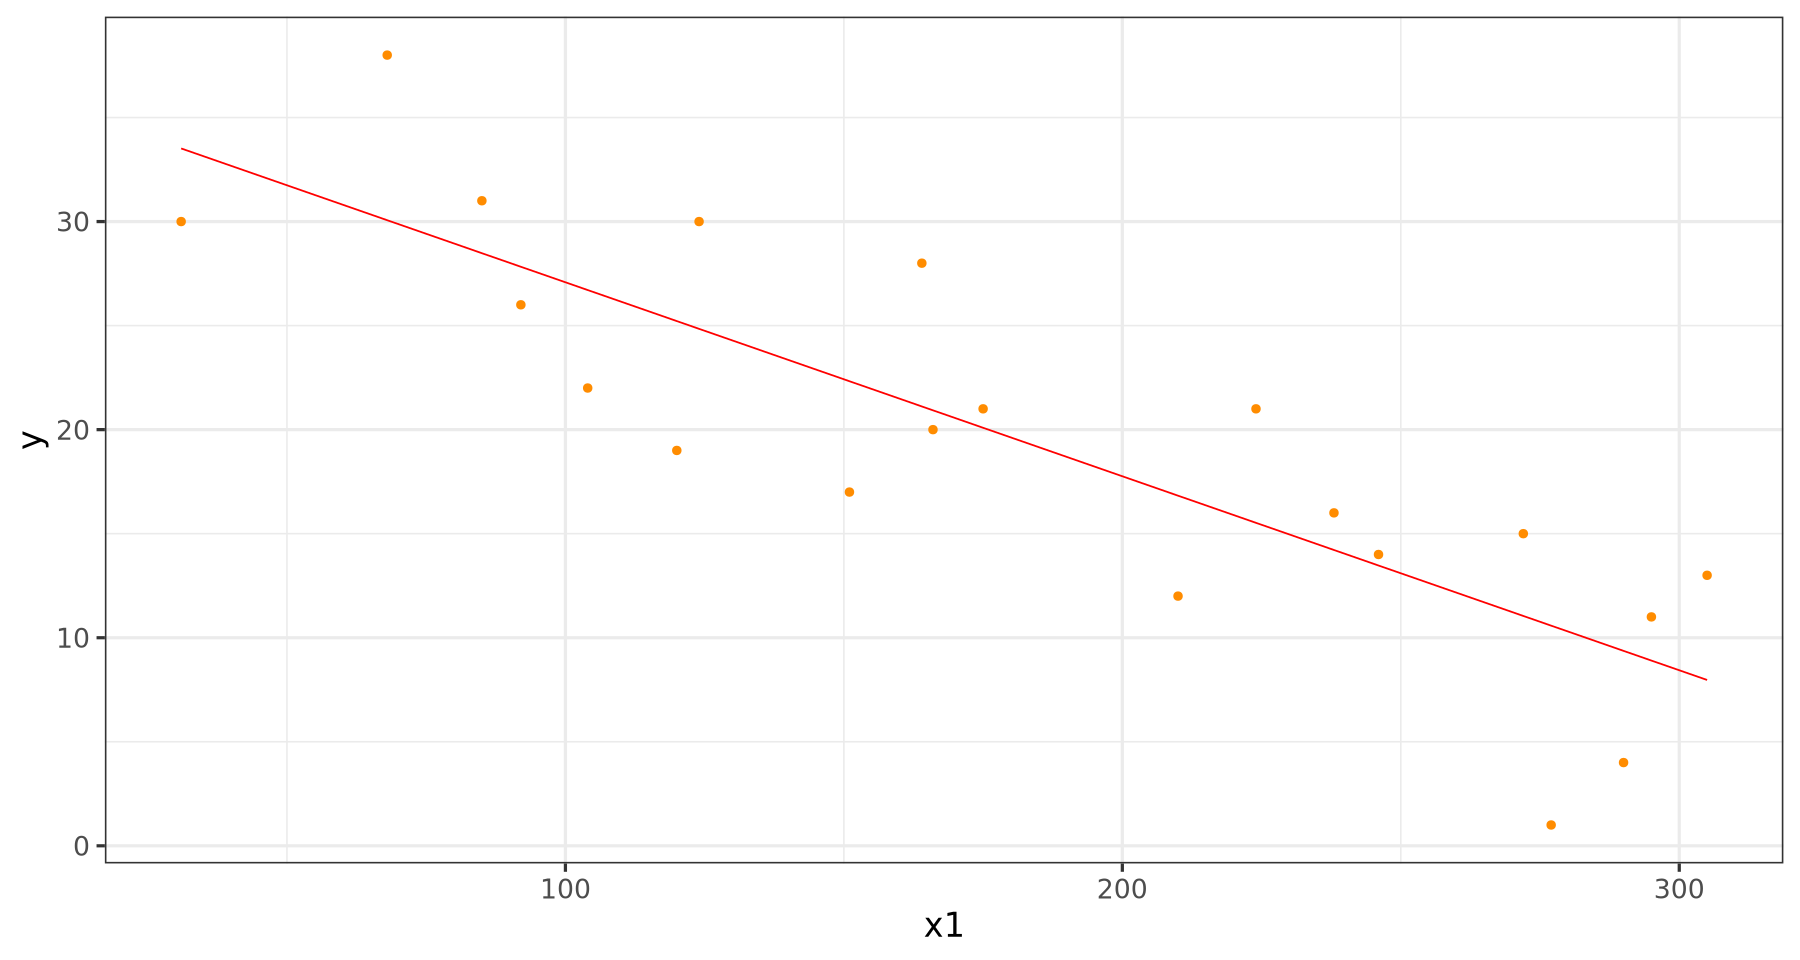

In [20]:
ggplot(dt, aes(x1, y)) +
    geom_point(col = "darkorange", cex = 2) +
    geom_line(aes(x1, predict(model1)), col = "red") +
    theme_bw(base_size = 20)

* Model 2

$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \epsilon_i, \boldsymbol{\epsilon} \sim N(\boldsymbol{0}, \sigma^2 I) \\
x_{i2} = \begin{cases}
 1, Male\\
 0, Female\\
\end{cases}$

In [22]:
model_2 <- lm(y~., dt)
summary(model_2)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0165 -1.7450 -0.6055  1.8803  6.1835 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.768865   1.948930  21.432 9.64e-14 ***
x1          -0.100918   0.008621 -11.707 1.47e-09 ***
x2M         -7.933953   1.414702  -5.608 3.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.123 on 17 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8872 
F-statistic: 75.72 on 2 and 17 DF,  p-value: 3.42e-09


> x2M으로 표시된 것으로 보아, Male일 경우 해당 절편만큼 더해진다.

In [23]:
model.matrix(model_2)

,(Intercept),x1,x2M
1,1,151,1
2,1,92,1
3,1,175,1
4,1,31,1
5,1,104,1
6,1,277,1
7,1,210,1
8,1,120,1
9,1,290,1
10,1,238,1


> 원-핫 인코딩 후 드랍하는 방식

* 여자인 경우 : $\begin{align} y = \beta_0 + \beta_1 x_1 + \epsilon\\
                E(y|x) = \beta_0 + \beta_1 x_1\end{align}$

* 남자인 경우 : $\begin{align} y = \beta_0 + \beta_1 x_1 + \beta_2 \epsilon\\
                E(y|x) = (\beta_0 + \beta_2) \beta_1 x_1\end{align}$


> 즉, 기울기는 성별로 차이가 없지만, 남자가 여자보다 평균 시간이 7.934 더 적게 걸린다고 해석할 수 있다.

In [33]:
model_2$coef

(Intercept)          x1         x2M 
 41.7688646  -0.1009177  -7.9339526

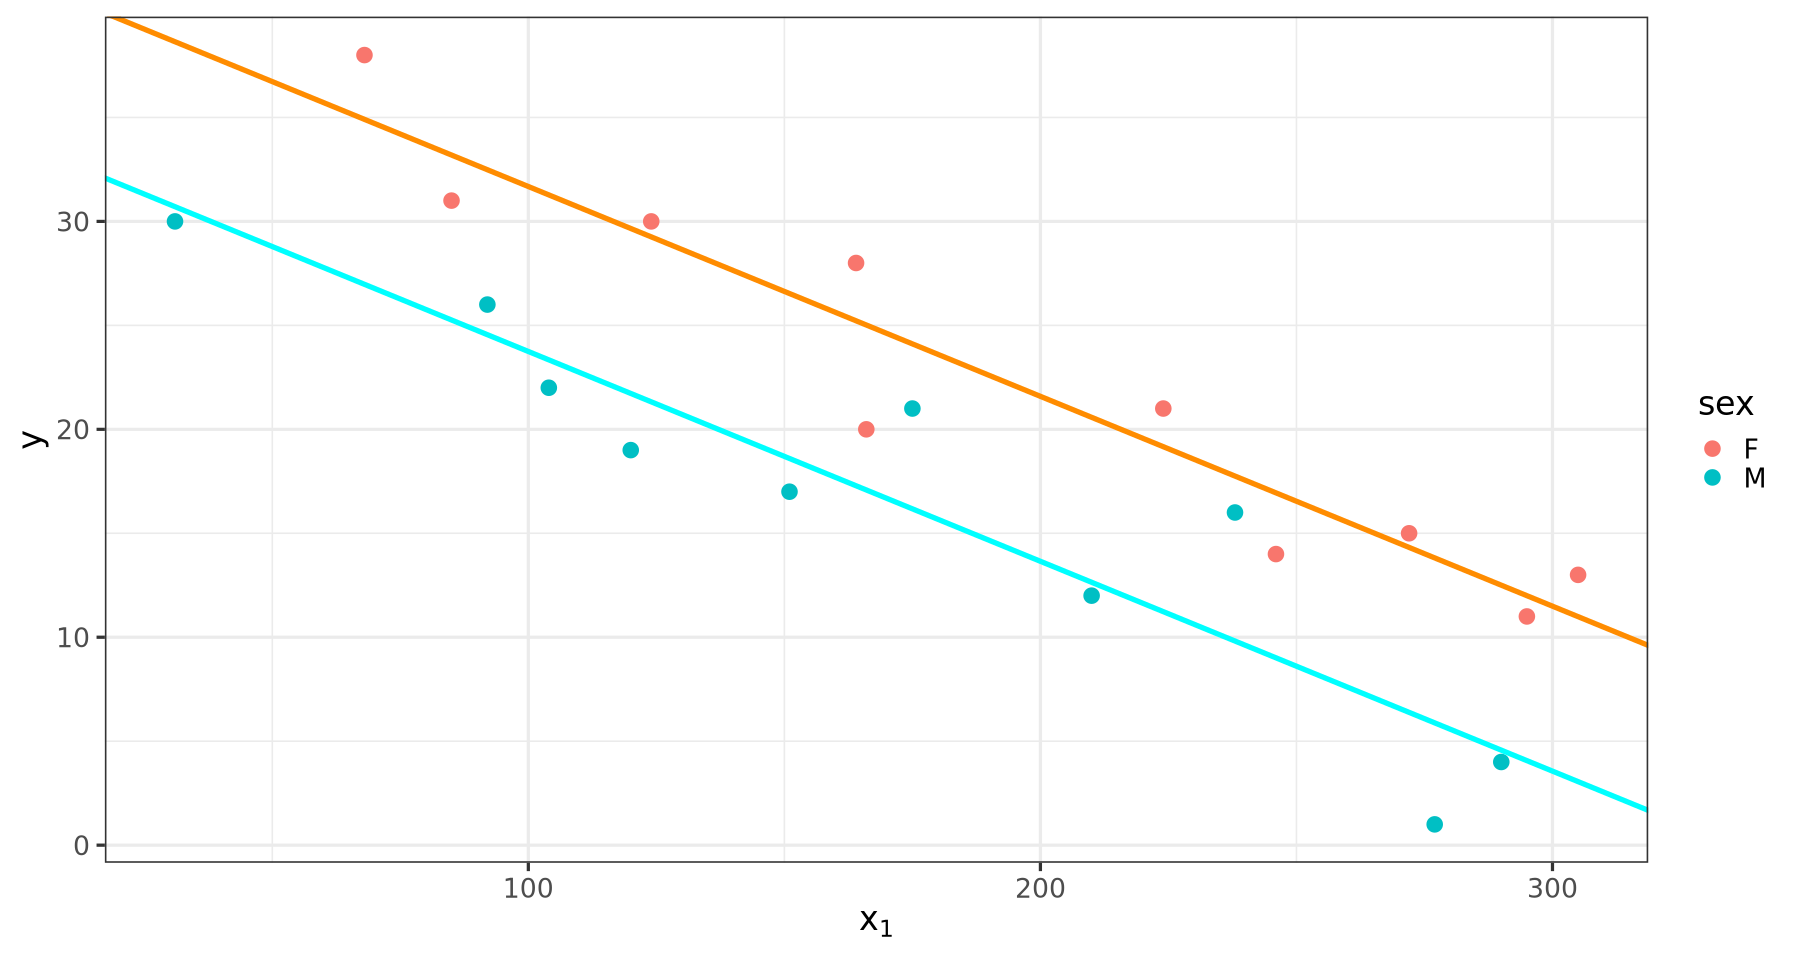

In [45]:
ggplot(dt, aes(x1, y, col = x2)) +
    geom_point(cex = 4) +
    theme_bw(base_size = 20) +
    xlab(expression(x[1])) +
    geom_abline(slope = coef(model_2)[2], intercept = coef(model_2)[1], col = "darkorange", lwd = 1.5) +
    geom_abline(slope = coef(model_2)[2], intercept = coef(model_2)[1] + coef(model_2)[3], col = "cyan", lwd = 1.5) +
    guides(col = guide_legend(title = "sex"))

* Interaction effects

$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_{3} x_{i1}x_{i2} + \epsilon_i, \boldsymbol{\epsilon} \sim N(\boldsymbol{0}, \sigma^2 I) \\
x_{i2} = \begin{cases}
 1, Male\\
 0, Female\\
\end{cases}$

> * mean response : $E(y|x) = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \beta_{3} x_{1}x_{2}$
> * Female : $\begin{align} y_i = \beta_0 + \beta_1 x_{i1} + \epsilon \\
                E(y|F) = \beta_0 + \beta_1 x \end{align}$
> * Male : $\begin{align} y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 + \beta_3 x_{i1} + \epsilon \\
            E(y|M) = \beta_0 + \beta_2 + (\beta_1 + \beta_3) x_1 \end{align}$

In [48]:
model_3 <- lm(y~x1*x2, dt)  ## 개별 작용과 교호작용 둘다 독립변수로 알아서 잡음
summary(model_3)


Call:
lm(formula = y ~ x1 * x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0463 -1.7591 -0.6232  1.9311  6.1102 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.969620   2.635580  15.924 3.11e-11 ***
x1          -0.101948   0.012474  -8.173 4.20e-07 ***
x2M         -8.313516   3.541379  -2.348   0.0321 *  
x1:x2M       0.002089   0.017766   0.118   0.9078    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.218 on 16 degrees of freedom
Multiple R-squared:  0.8992,	Adjusted R-squared:  0.8803 
F-statistic: 47.56 on 3 and 16 DF,  p-value: 3.405e-08


> $\beta_3 = 0.002089$이므로, 남자의 성적 1단위당 감소하는 학습시간의 정도가 여자보다 0.002089시간이 더 크다고 할 수 있다. *(하지만, p-value가 낮으므로 통계적으로 차이가 없다.)*

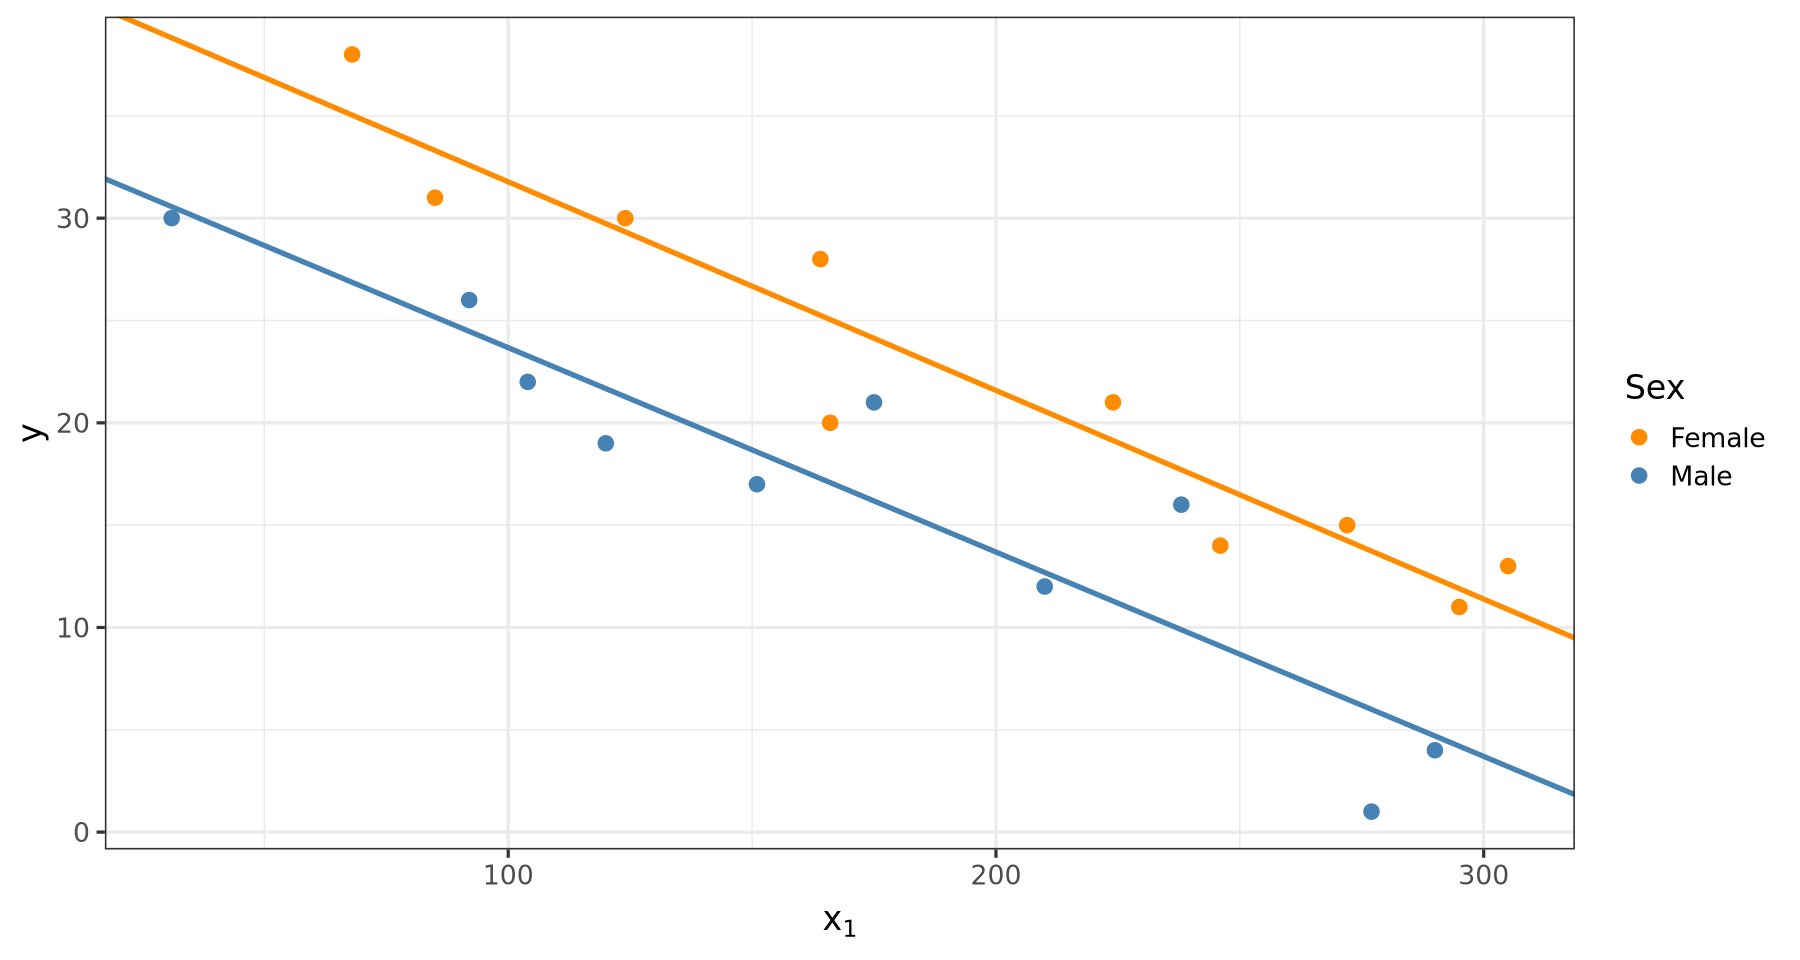

In [50]:
ggplot(dt, aes(x1, y, col=x2)) +
 geom_point(size=4) +
 xlab(expression(x[1])) +
 theme_bw(base_size = 20) +
 geom_abline(slope = coef(model_3)[2],
 intercept = coef(model_3)[1],
 col= 'darkorange', lwd=1.5)+
 geom_abline(slope = coef(model_3)[2]+coef(model_3)[4],
 intercept = coef(model_3)[1]+coef(model_3)[3],
 col= 'steelblue', lwd=1.5)+
 guides(col=guide_legend(title="Sex")) +
 scale_color_manual(labels = c("Female", "Male"), values = c("darkorange", "steelblue"))

* Carseats data

In [52]:
library(ISLR)
head(Carseats)
dim(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


[1] 400  11

> 만약 전부 설명변수로 사용한다면, 범주가 3개인 범주형 설명변수가 있으므로 열의 갯수는 12개가 되겠다...

* Price와 ShelveLoc을 설명변수, Sales를 반응변수로 하여 회귀모형을 작성

In [53]:
fit <- lm(Sales~Price+ShelveLoc, Carseats)
summary(fit)


Call:
lm(formula = Sales ~ Price + ShelveLoc, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8229 -1.3930 -0.0179  1.3868  5.0780 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     12.001802   0.503447  23.839  < 2e-16 ***
Price           -0.056698   0.004059 -13.967  < 2e-16 ***
ShelveLocGood    4.895848   0.285921  17.123  < 2e-16 ***
ShelveLocMedium  1.862022   0.234748   7.932 2.23e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.917 on 396 degrees of freedom
Multiple R-squared:  0.5426,	Adjusted R-squared:  0.5391 
F-statistic: 156.6 on 3 and 396 DF,  p-value: < 2.2e-16


In [54]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


> `Bad`가 basis이고, 나머지가 계수로 들어갔다.

* 진열대의 등급이 좋은 것(Good)은 좋지 않은 것(Bad)에 비해 평균적으로 가격이 4.9 높았다.

* 진열대의 등급이 보통인 것(Medium)은 좋지 않은 것(Bad)에 비해 다른 모든 설명변수가 0인 시점에서 가격이 1.86 더 높았다.

*통계적으로 다 유의미하니까...*


$Sales = \beta_0 + \beta_1 Price + \beta_2 I(ShelveLoc = Good) + \beta_3 I(ShelveLoc = Medium + \epsilon)$

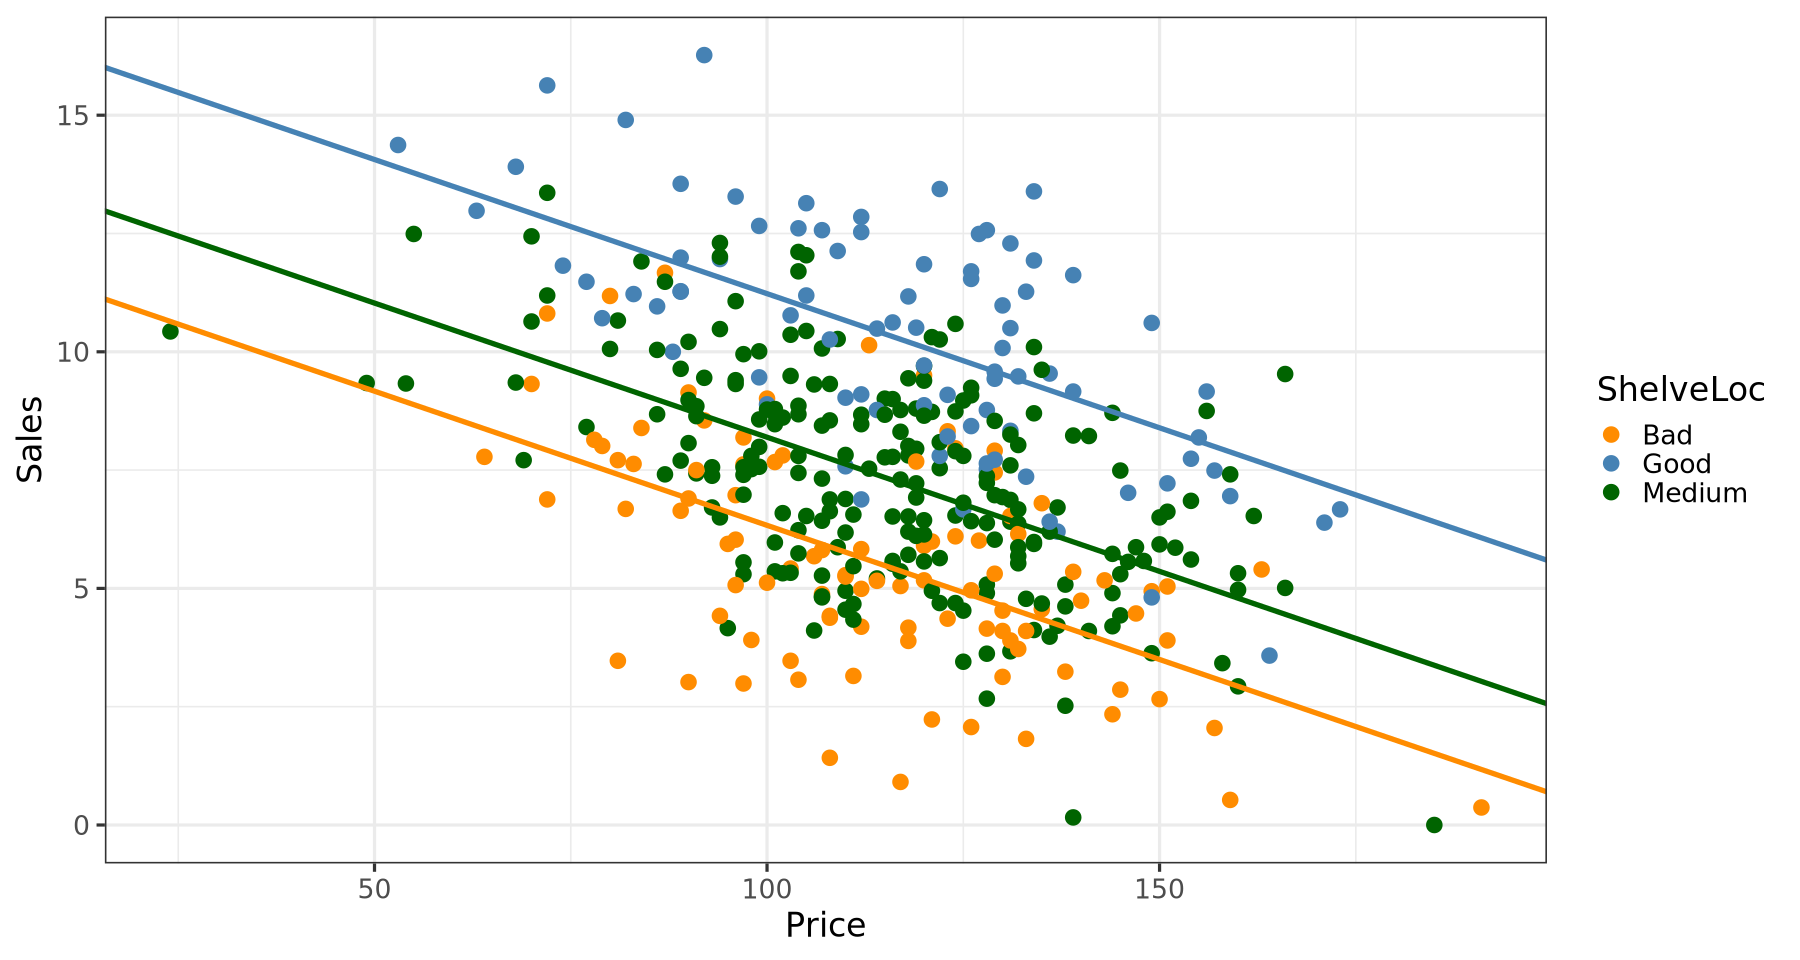

In [55]:
ggplot(Carseats, aes(Price, Sales, col=ShelveLoc)) +
 geom_point(size=4) +
 theme_bw(base_size = 20) +
 geom_abline(slope = coef(fit)[2],
            intercept = coef(fit)[1],
            col= 'darkorange', lwd=1.5)+
 geom_abline(slope = coef(fit)[2],
            intercept = coef(fit)[1]+coef(fit)[3],
            col= 'steelblue', lwd=1.5)+
 geom_abline(slope = coef(fit)[2],
            intercept = coef(fit)[1]+coef(fit)[4],
            col= 'darkgreen', lwd=1.5)+
 guides(col=guide_legend(title="ShelveLoc")) +
 scale_color_manual(labels = c("Bad", "Good", "Medium"),
 values = c("darkorange", "steelblue","darkgreen"))

* 구간별 회귀분석

$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 (x_{i1} - x_w) x_{i2} + \epsilon$

* $x_{i1} : $ 주문량
* $x_{i2} \begin{cases}
    0, x_{i1} < x_w \\
    1, x_{i1} ≥ x_w \end{cases}$

In [56]:
dt <- data.frame(
 y = c(377,249,355,475,139,452,440,257),
 x1 = c(480,720,570,300,800,400,340,650)
)

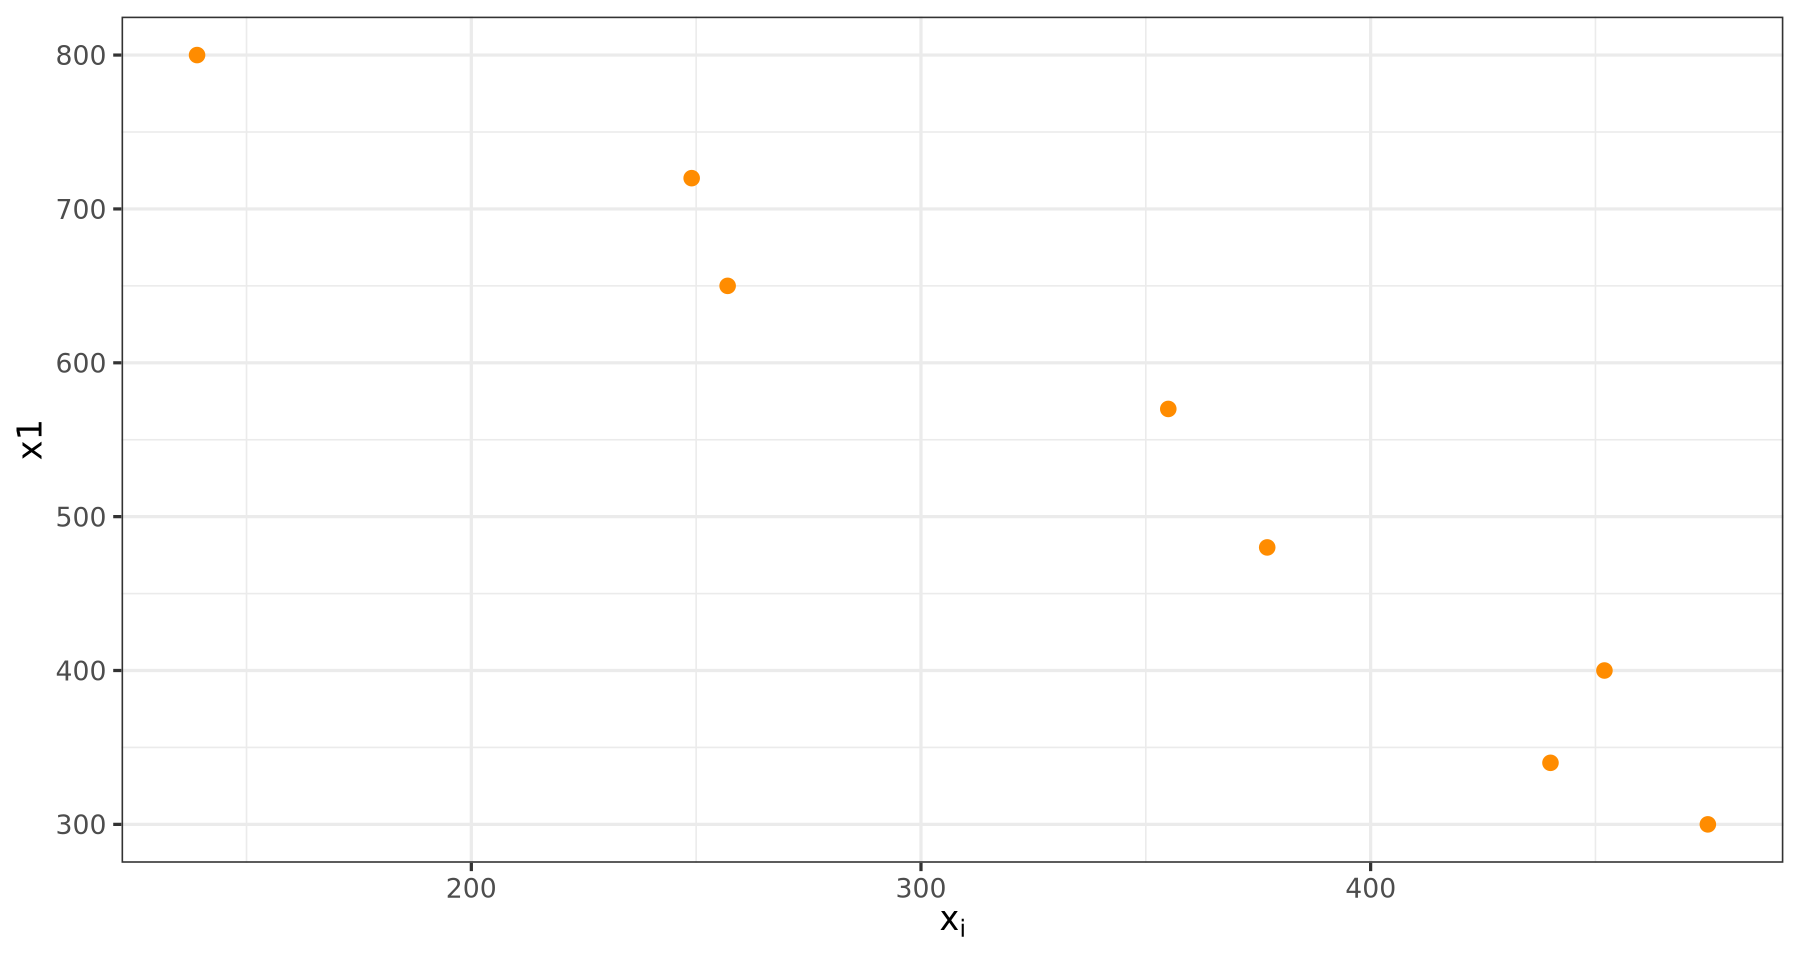

In [57]:
ggplot(dt, aes(y, x1)) + 
    geom_point(col = "darkorange", cex = 4) +
    xlab(expression(x[i])) +
    theme_bw(base_size = 20)

> Thershould(한계점) = 500

아래는 동일하다.

$x_2(x_1 - x_w) = x_2(x_1 - 500) = (x_1 - 500)_+ \to$ 양수만 받겠다는 기호

In [64]:
dt$x2 = sapply(dt$x1, function(x) {max(0, x - 500)})  ## lapply하니까 좀 꺼림직하게 들어감.
dt

y,x1,x2
<dbl>,<dbl>,<dbl>
377,480,0
249,720,220
355,570,70
475,300,0
139,800,300
452,400,0
440,340,0
257,650,150


In [65]:
m <- lm(y~x1+x2, dt)  ## 구간별 회귀분석
summary(m)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
      1       2       3       4       5       6       7       8 
-22.765  29.765  18.068   4.068 -17.463  20.605 -15.117 -17.160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 589.5447    60.4213   9.757 0.000192 ***
x1           -0.3954     0.1492  -2.650 0.045432 *  
x2           -0.3893     0.2310  -1.685 0.152774    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.49 on 5 degrees of freedom
Multiple R-squared:  0.9693,	Adjusted R-squared:  0.9571 
F-statistic: 79.06 on 2 and 5 DF,  p-value: 0.0001645


* 추정된 직선 : $\hat{y} = 589.5447 - 0.3954 x_1 - 0.3893(x_1 - 500)x_2$

In [66]:
summary(lm(y~x1, dt))


Call:
lm(formula = y ~ x1, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.983 -17.335  -5.465  24.673  35.694 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 679.45511   32.41223   20.96 7.68e-07 ***
x1           -0.63184    0.05796  -10.90 3.53e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28 on 6 degrees of freedom
Multiple R-squared:  0.9519,	Adjusted R-squared:  0.9439 
F-statistic: 118.8 on 1 and 6 DF,  p-value: 3.534e-05


> 모델의 성능이 조금이나마 개선되기는 했는데, 애초에 x2에 해당하는 회귀계수가 그렇게 의미가 있지도 않음...

* 시각화

In [67]:
dt2 <- rbind(dt[, 2:3], c(500, 0))  ## for prediction and split
dt2$y <- predict(m, dt2)

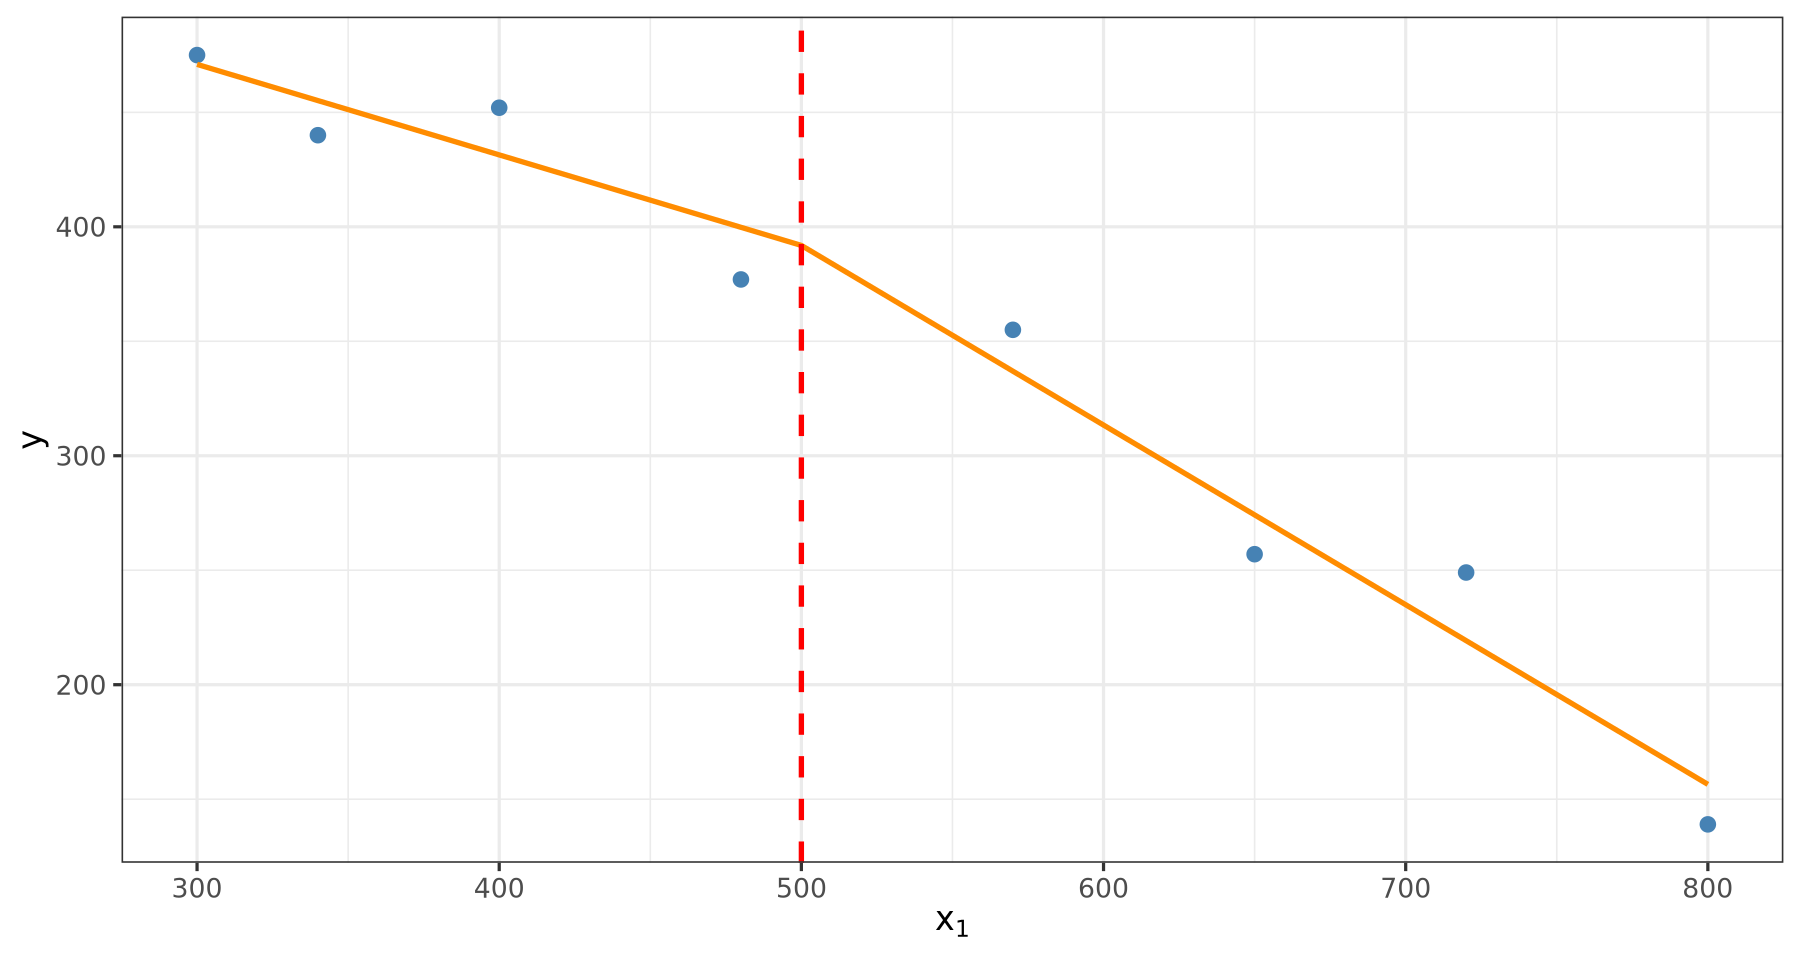

In [68]:
# this is the predicted line of multiple linear regression
ggplot(data = dt, aes(x = x1, y = y)) +
 geom_point(color='steelblue', size=4) +
 xlab(expression(x[1])) +
 geom_line(color='darkorange', data = dt2, aes(x=x1, y=y), lwd=1.5)+
 geom_vline(xintercept = 500, lty=2, col='red', lwd=1.5)+
 theme_bw(base_size = 20)